<div style="display: flex; justify-content: center; align-items: center; height: 100vh;">
    <img src="https://curso.infnet.com.br/c/wp-content/uploads/sites/5/2022/12/Infnet-Logo.png" height="350" width="350">
</div>

<p><b><font size = 5 face = 'verdana'> NLP com Python [25E2_2] - PROJETO FINAL</font></b></p>
<p><font size = 3 face = 'verdana'>Trabalho apresentado √† conclus√£o do curso de Processamento de linguagem natural com Python [25E2_2] do MIT em Intelig√™ncia Artificial, Machine Learning e Deep Learning, Instituto INFNET, como requisito parcial de avalia√ß√£o. </font></b></p>
<p><font size = 3 face = 'verdana'><b>PROFESSOR:</b> Fernando Guimar√£es Ferreira<br>
<b>ALUNO:</b> Osemar da Silva Xavier<br>
<b>E-MAIL:</b> osemar.xavier@al.infnet.edu.br<br>
<hr>
<p><font size = 3 face = 'verdana'>
<hr></hr>

<h4><b><u>Descri√ß√£o do projeto:</u></b></h4>

<p>Bem-vindo ao projeto de disciplina de <b>Processamento de Linguagem Natural (PLN)</b> com Python.
Ao longo das √∫ltimas aulas, exploramos uma s√©rie de aplica√ß√µes que demonstraram a amplitude de possibilidades ao trabalhar com textos.
Para isso, utilizamos diversas bibliotecas, destacando-se:</p>

<ol>
    <li><b>NLTK</b></li>
    <li><b>Spacy</b></li>
    <li><b>Gensim</b></li>
</ol>

<p>Este notebook servir√° como guia para a execu√ß√£o de uma <b>an√°lise de t√≥picos completa</b>,
utilizando o algoritmo de <b>LDA (Latent Dirichlet Allocation)</b> e recursos para interpreta√ß√£o dos resultados.
Os dados utilizados s√£o not√≠cias da se√ß√£o <i>"Mercado"</i> extra√≠das da <b>Folha de S. Paulo</b> no ano de 2016.</p>

<p>Complete a an√°lise com os c√≥digos que considerar pertinentes e responda √†s quest√µes presentes no Moodle.
<b>Boa sorte!</b></p>

<hr>

<h4><b><u>O Notebook</u></b></h4>

<p>Neste notebook, voc√™ ser√° guiado pela an√°lise de <b>Extra√ß√£o de T√≥picos</b>.
As seguintes tarefas ser√£o realizadas:</p>

<ol>
    <li><b>Download dos dados</b> provenientes do Kaggle.</li>
    <li><b>Sele√ß√£o dos dados relevantes</b> para a nossa an√°lise.</li>
    <li><b>Instala√ß√£o das principais ferramentas</b> e importa√ß√£o de m√≥dulos.</li>
    <li><b>Pr√©-processamento usando NLTK</b>.</li>
    <li><b>Pr√©-processamento usando Spacy</b>.</li>
    <li><b>An√°lise de t√≥picos utilizando LDA</b>.</li>
    <li><b>An√°lise de NER (Reconhecimento de Entidades Nomeadas)</b> usando Spacy.</li>
    <li><b>Visualiza√ß√£o dos t√≥picos</b> utilizando tokens e entidades.</li>
</ol>
<h4><b><u>Objetivo</u></b></h4>

<p>O c√≥digo possui lacunas e √© necess√°rio complet√°-las (Normalmente denotadas por coment√°rios "ESCREVA AQUI").


 Abra o notebook no Colab notebook e complete o c√≥digo para realizar a an√°lise completa. O objetivo √© separar not√≠cias em portugu√™s em 9 t√≥picos distintos. No fim, voc√™ ir√° gerar uma nuvem de palavras e outra nuvem de entidades para cada um dos t√≥picos.

Ap√≥s a finaliza√ß√£o do c√≥digo, responda as quest√µes relacionadas √†s compet√™ncias</p>



<hr>

<p><b>Nota:</b> Utilize boas pr√°ticas de programa√ß√£o e documente cada etapa para facilitar a compreens√£o e replica√ß√£o dos resultados.</p>


<h2><b>1. Download dos dados - Pipeline de Acesso a Dados via API Kaggle no Google Colab</b></h2>

---

<h3><b>1a. Configura√ß√£o do Ambiente da API Kaggle</b></h3>

- Primeiramente fiz a importa√ß√£o da biblioteca <code>os</code> para manipular vari√°veis de ambiente.
- Em seguida criei a vari√°vel <code>KAGGLE_CONFIG_DIR</code> apontando para o diret√≥rio padr√£o <code>/root/.kaggle</code>.
- Para garanbtir a exist√™ncia da pasta coloquei o arquivo <code>kaggle.json</code> contendo as credenciais de acesso.
- Por fim, defini as permiss√µes corretas do arquivo para seguran√ßa.

In [12]:
from google.colab import files
files.upload()  # Fa√ßa o upload do arquivo kaggle.json gerado na sua conta Kaggle

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oserxavier","key":"6fc5124c867a419e49d4c28c227268a4"}'}

In [13]:
# Configura√ß√£o do ambiente do Kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

<hr>
<h3><b>1b. Fazer o Download do Dataset via API Kaggle</b></h3>
Utilizei o comando <code>kaggle datasets download</code> para baixar diretamente o dataset desejado.

O par√¢metro <code>--force</code> garante que o download seja feito mesmo se o arquivo j√° existir.

In [14]:
# Download do dataset
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0
 57% 107M/187M [00:00<00:00, 1.12GB/s]
100% 187M/187M [00:00<00:00, 698MB/s] 


<hr>
<h3><b>1c. Nessa etapa fiz a extra√ß√£o  do Arquivo ZIP e Verifiquei os Arquivos Extra√≠dos</b></h3>
Em seguida fiz a extra√ß√£o dos arquivos compactados usando o comando <code>unzip -o</code>, que sobrescreve arquivos existentes sem solicitar confirma√ß√£o.

O comando <code>ls</code> lista o arquivo, no caso "articles.csv".

In [15]:
# Extrair o arquivo ZIP e verificar os arquivos extra√≠dos
!unzip -o news-of-the-site-folhauol.zip -d ./news_folhauol
!ls ./news_folhauol

Archive:  news-of-the-site-folhauol.zip
  inflating: ./news_folhauol/articles.csv  
articles.csv


<hr>
<h2><b>2. Sele√ß√£o dos dados relevantes para a nossa an√°lise</b></h2>
<h3><b>2a. Fazer o Download do Dataset via API Kaggle</b></h3>
Criei o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [16]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()
df = pd.read_csv("./news_folhauol/articles.csv")
df.head()

title  \
0  Lula diz que est√° 'lascado', mas que ainda tem...   
1  'Decidi ser escrava das mulheres que sofrem', ...   
2  Tr√™s reportagens da Folha ganham Pr√™mio Petrob...   
3  Filme 'Star Wars: Os √öltimos Jedi' ganha trail...   
4  CBSS inicia acordos com fintechs e quer 30% do...   

                                                text        date   category  \
0  Com a possibilidade de uma condena√ß√£o impedir ...  2017-09-10      poder   
1  Para Oumou Sangar√©, cantora e ativista malines...  2017-09-10  ilustrada   
2  Tr√™s reportagens da Folha foram vencedoras do ...  2017-09-10      poder   
3  A Disney divulgou na noite desta segunda-feira...  2017-09-10  ilustrada   
4  O CBSS, banco da holding Elopar dos s√≥cios Bra...  2017-09-10    mercado   

  subcategory                                               link  
0         NaN  http://www1.folha.uol.com.br/poder/2017/10/192...  
1         NaN  http://www1.folha.uol.com.br/ilustrada/2017/10...  
2         NaN  http://www1.folha.uol.com.br/poder/2017/10/192...  
3         NaN  http://www1.folha.uol.com.br/ilustrada/2017/10...  
4         NaN  http://www1.folha.uol.com.br/mercado/2017/10/1...

<hr>
<h2><b>3. Instala√ß√£o das principais ferramentas e importa√ß√£o de m√≥dulos.</b></h2>
<h3><b>3a. Atualizar o SPACY e instalar os modelos pt_core_news_lg</b></h3>
Fiz a instala√ß√£o e a atualiza√ß√£o do <b>Spacy/ pt_core_news_lg</b>

In [17]:
!pip install -U spacy
!python -m spacy download pt_core_news_lg


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 4.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.8/16.8 MB 109.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have 

In [18]:
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

# Carregar o modelo de linguagem em portugu√™s
nlp = spacy.load("pt_core_news_lg")


<h3><b>3b. Instalar os datasets <code>stopwords</code>, <code>punkt</code> e <code>rslp</code> do nltk</b></h3>

<p>Para realizar pr√©-processamento de textos em portugu√™s com <code>NLTK</code> (Natural Language Toolkit), fiz a instala√ß√£o de alguns recursos fundamentais para o projeto. Abaixo explico a fun√ß√£o de cada um:</p>

---

<h4><b><code>stopwords</code> ‚Äî Lista de Palavras Vazias</b></h4>

<ul>
  <li>As <b>stopwords</b> s√£o palavras comuns que geralmente n√£o agregam significado relevante ao texto, como <i>de, a, o, que, por, com</i>.</li>
  <li>Essas palavras s√£o removidas durante o pr√©-processamento de textos para evitar ru√≠do na an√°lise.</li>
  <li>O NLTK disponibiliza listas de stopwords em diversos idiomas, incluindo o portugu√™s.</li>
</ul>

<pre><code>from nltk.corpus import stopwords
stopwords.words('portuguese')
</code></pre>

---

<h4><b><code>punkt</code> ‚Äî Tokenizador Baseado em Pontua√ß√£o</b></h4>

<ul>
  <li>√â um modelo treinado para <b>tokenizar textos</b>, ou seja, dividir frases em palavras ou senten√ßas com base na pontua√ß√£o e estrutura.</li>
  <li>Ele √© utilizado por tr√°s de fun√ß√µes como <code>word_tokenize</code> e <code>sent_tokenize</code>.</li>
  <li>Mesmo sendo baseado em regras e estat√≠sticas, funciona bem para v√°rios idiomas.</li>
</ul>

<pre><code>from nltk.tokenize import word_tokenize
tokens = word_tokenize("Ol√°, tudo bem?")
</code></pre>

---

<h4><b><code>rslp</code> ‚Äî Stemmer para o Portugu√™s</b></h4>

<ul>
  <li>O <b>RSLP</b> (Removedor de Sufixos da L√≠ngua Portuguesa) √© um algoritmo de stemming que reduz palavras ao seu radical.</li>
  <li>Por exemplo, transforma <i>jogando</i>, <i>jogador</i> e <i>jogo</i> em <code>jog</code>.</li>
  <li>√â √∫til para normalizar o vocabul√°rio antes da vetoriza√ß√£o em modelos de NLP.</li>
</ul>

<pre><code>from nltk.stem import RSLPStemmer
stemmer = RSLPStemmer()
stemmer.stem("amando")  # retorna: 'am'
</code></pre>

---

<h4><b>Como instalar os tr√™s:</b></h4>

<pre><code>import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')
</code></pre>


In [19]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

<h3><b>3c. NLTK Tokenizer and Stemmer</b></h3>

In [23]:
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from typing import List

def tokenize(text: str) -> List:
    tokens = word_tokenize(text.lower())
    stemmer = RSLPStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token.isalpha()]
    return stemmed_tokens

<h3><b>3d. Carregar os m√≥dulos usados ao longo desse notebook</b></h3>

In [25]:
!pip install pyLDAvis >/dev/null

In [26]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any

SEED = 123

<h3><b>3e. Filtrando os dados para utilizar apenas as not√≠cias do ano de 2016 e da categoria "Mercado"</b></h3>

In [27]:
# Converter a coluna de datas para o formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtrar as not√≠cias de 2016 e da categoria "Mercado"
news_2016 = df[(df['date'].dt.year == 2016) & (df['category'].str.lower() == 'mercado')]

# Verificar as primeiras linhas do DataFrame filtrado
news_2016.head()

title  \
34207  Fazendeira cria pr√≥pria rede de banda larga e ...   
34238  Altera√ß√£o na cobran√ßa do ICMS eleva conta de c...   
34245  Ajustes sobre servidores p√∫blicos emperram nos...   
34248  Inventor da internet das coisas ataca mitos so...   
34249  Livro analisa empresas de crescimento exponenc...   

                                                    text       date category  \
34207  "Sou apenas a mulher de um fazendeiro", diz Ch... 2016-12-31  mercado   
34238  A conta do celular p√≥s-pago ou controle ficar√°... 2016-12-31  mercado   
34245  A maior parte dos projetos de ajuste das conta... 2016-12-31  mercado   
34248  Desde as primeiras d√©cadas do s√©culo 19 se diz... 2016-12-31  mercado   
34249  O Cifras & Letras seleciona semanalmente lan√ßa... 2016-12-31  mercado   

      subcategory                                               link  
34207         NaN  http://www1.folha.uol.com.br/mercado/2016/12/1...  
34238         NaN  http://www1.folha.uol.com.br/mercado/2016/12/1...  
34245         NaN  http://www1.folha.uol.com.br/mercado/2016/12/1...  
34248         NaN  http://www1.folha.uol.com.br/mercado/2016/12/1...  
34249         NaN  http://www1.folha.uol.com.br/mercado/2016/12/1...

<h3><b>4. Criar um documento <code>spaCy</code> para cada texto do dataset</b></h3>

<p>
A biblioteca <code>spaCy</code> √© uma das ferramentas mais poderosas para Processamento de Linguagem Natural (PLN). Nesta etapa, aplicamos o modelo pr√©-treinado <code>pt_core_news_lg</code> da spaCy para analisar os textos contidos no dataset filtrado <code>news_2016</code>.
</p>

---

<h4><b>Objetivo</b></h4>

<p>
Gerar, para cada linha do nosso DataFrame, um objeto <code>Doc</code> do spaCy ‚Äî que representa a estrutura lingu√≠stica de um texto. Esse objeto conter√° informa√ß√µes ricas, como:
</p>

<ul>
  <li>Tokens j√° lematizados</li>
  <li>Etiquetas gramaticais (POS tagging)</li>
  <li>Entidades nomeadas (NER)</li>
  <li>√Årvore de depend√™ncia sint√°tica</li>
</ul>

---

<h4><b> Etapas realizadas</b></h4>

<ol>
  <li><b>Importa√ß√£o</b> da biblioteca <code>spaCy</code> e do <code>tqdm</code> para barra de progresso.</li>
  <li><b>Carregamento</b> do modelo <code>pt_core_news_lg</code>, que traz embeddings, regras lingu√≠sticas e vetores sem√¢nticos para o portugu√™s.</li>
  <li><b>Aplica√ß√£o</b> do modelo spaCy a cada texto da coluna <code>text</code> do DataFrame <code>news_2016</code>, criando uma nova coluna chamada <code>spacy_doc</code>.</li>
</ol>

---

<h4><b>C√≥digo</b></h4>

```python
import spacy
from tqdm.auto import tqdm

# Carrega o modelo de linguagem em portugu√™s
nlp = spacy.load("pt_core_news_lg")

# Exibe barra de progresso com tqdm
tqdm.pandas()

# Aplica o spaCy e salva os objetos Doc na nova coluna
news_2016.loc[:, 'spacy_doc'] = news_2016['text'].progress_map(nlp)


In [28]:
import spacy
from tqdm.auto import tqdm

# Carrega o modelo de linguagem em portugu√™s
nlp = spacy.load("pt_core_news_lg")

# Aplica o modelo spaCy a cada texto e armazena como um Doc na coluna 'spacy_doc'
tqdm.pandas()
news_2016.loc[:, 'spacy_doc'] = news_2016['text'].progress_map(nlp)


  0%|          | 0/7943 [00:00<?, ?it/s]

<h3><b>4. Criar um documento <code>spaCy</code> para cada texto do dataset</b></h3>
O modelo NLP do spacy oferece a possiblidade de lematizar textos em portugu√™s (o que n√£o acontece com a biblioteca NLTK). Iremos criar uma lista de tokens lematizados para cada texto do nosso dataset. Para tal, iremos retirar as stopwords, usando uma fun√ß√£o que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, √© retornada pela fun√ß√£o stopwords (e voc√™ n√£o precisa mexer).

J√° a fun√ß√£o filter retorna True caso o token seja composto por caracters alfab√©ticos, n√£o estiver dentro da lista de stopwords e o lemma resultante n√£o estiver contido na lista <code><b>o", "em", "em o", "em a" e "ano"</b></code>.

Crie uma coluna chamada <code>spacy_lemma</code>. para armazenar o resultado desse pr√©-processamento.

In [29]:
import nltk
from typing import List, Set
from spacy.lang.pt.stop_words import STOP_WORDS
import spacy

# Certifique-se de baixar stopwords do nltk
nltk.download('stopwords')

# Combina√ß√£o de stopwords do NLTK e do spaCy
def stopwords() -> Set:
    """
    Return complete list of stopwords (NLTK + spaCy)
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

def filter(w: spacy.tokens.Token) -> bool:
    """
    Filter stopwords and undesired tokens

    Rejeita tokens que:
    - S√£o stopwords
    - N√£o s√£o alfab√©ticos
    - T√™m menos de 3 letras
    """
    return (
        not w.is_stop and               # n√£o seja stopword (baseado no modelo spaCy)
        w.is_alpha and                  # deve conter apenas letras
        len(w.text.strip()) > 2 and     # m√≠nimo de 3 caracteres
        w.lemma_.lower() not in complete_stopwords  # n√£o esteja na lista combinada
    )

def lemma(doc: spacy.tokens.Doc) -> List[str]:
    """
    Apply spaCy lemmatization and filtering on a Doc object.

    Retorna:
    - Uma lista de palavras lematizadas e filtradas
    """
    return [w.lemma_.lower() for w in doc if filter(w)]

# Aplicar ao DataFrame
news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


  0%|          | 0/7943 [00:00<?, ?it/s]

<h3><b>5. Reconhecimento de Entidades Nomeadas (NER) ‚Äî Organiza√ß√µes</b></h3>

<p>
O reconhecimento de entidades nomeadas (Named Entity Recognition ‚Äî NER) √© uma t√©cnica de <b>Processamento de Linguagem Natural</b> usada para identificar e classificar automaticamente elementos espec√≠ficos dentro de um texto, como nomes de pessoas, locais, datas e organiza√ß√µes.
</p>

<p>
Nesta etapa, nosso foco √© identificar <b>apenas organiza√ß√µes</b> mencionadas nos textos do dataset filtrado para o ano de 2016, utilizando o modelo <code>pt_core_news_lg</code> da biblioteca spaCy.
</p>

---

<h4><b>Etapa 5.1 ‚Äî Criar uma fun√ß√£o para extrair apenas entidades do tipo "ORG"</b></h4>

```python
def NER(doc: spacy.tokens.Doc):
    """
    Retorna uma lista com todas as organiza√ß√µes (label ORG) identificadas em um texto processado pelo spaCy.
    """
    return [ent.text for ent in doc.ents if ent.label_ == "ORG"]


In [30]:
def NER(doc: spacy.tokens.Doc):
    """
    Return the list of organizations for a SPACY document

    Par√¢metros:
        doc (spacy.tokens.Doc): Documento processado pelo modelo spaCy

    Retorna:
        List[str]: Lista com os nomes das organiza√ß√µes reconhecidas no texto
    """
    return [ent.text for ent in doc.ents if ent.label_ == "ORG"]

# Aplica a fun√ß√£o no DataFrame e cria a coluna 'spacy_ner'
news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)


  0%|          | 0/7943 [00:00<?, ?it/s]

<h4><b>Etapa 5.3 ‚Äî Unir todas as organiza√ß√µes e contar frequ√™ncia</b></h4> <p> Agora agregamos todas as organiza√ß√µes identificadas no corpus e contamos quantas vezes cada uma foi mencionada. </p>



In [31]:
from itertools import chain

# Junta todas as listas da coluna 'spacy_ner' em uma √∫nica lista
all_orgs = list(chain.from_iterable(news_2016['spacy_ner']))


In [32]:
from collections import Counter

# Conta quantas vezes cada organiza√ß√£o foi citada
org_freq = Counter(all_orgs)

# Converte para DataFrame para facilitar visualiza√ß√£o
import pandas as pd
org_df = pd.DataFrame(org_freq.items(), columns=['Organiza√ß√£o', 'Frequ√™ncia'])
org_df = org_df.sort_values(by='Frequ√™ncia', ascending=False).reset_index(drop=True)


<h4><b>Etapa 5.4 ‚Äî Visualizar as 15 organiza√ß√µes mais citadas</b></h4> <p> Abaixo, criamos um gr√°fico de barras horizontal com as 15 organiza√ß√µes mais mencionadas nas not√≠cias econ√¥micas de 2016. </p>

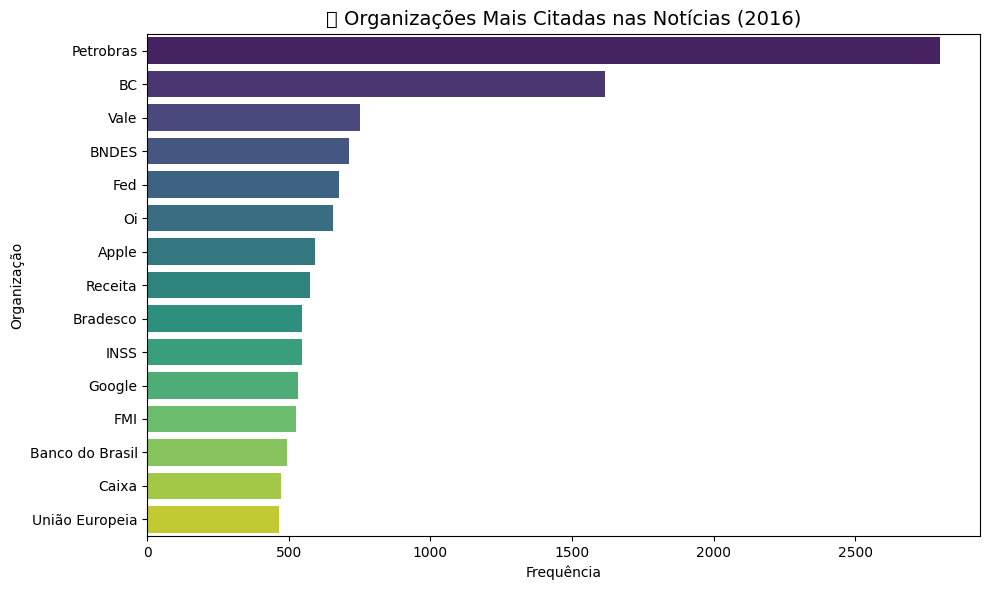

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar as 15 mais citadas
plt.figure(figsize=(10, 6))
sns.barplot(data=org_df.head(15), y='Organiza√ß√£o', x='Frequ√™ncia', palette='viridis')
plt.title('Organiza√ß√µes Mais Citadas nas Not√≠cias (2016)', fontsize=14)
plt.xlabel('Frequ√™ncia')
plt.ylabel('Organiza√ß√£o')
plt.tight_layout()
plt.show()


<h3><b>6. Bag-of-Words com TF-IDF</b></h3>

<p>
A t√©cnica <b>Bag-of-Words</b> (BoW) √© uma das formas mais cl√°ssicas de transformar texto em n√∫meros, ou seja, vetoriz√°-lo para que possa ser processado por algoritmos de aprendizado de m√°quina. Aqui, vamos utiliz√°-la em conjunto com o <b>TF-IDF</b> (Term Frequency-Inverse Document Frequency), uma medida que pondera a import√¢ncia de um termo em rela√ß√£o √† frequ√™ncia nos documentos.
</p>

<p>
Vamos usar a coluna <code>spacy_lemma</code> ‚Äî que cont√©m tokens lematizados e filtrados ‚Äî como base para a cria√ß√£o do vetor TF-IDF. Cada documento ser√° representado por um vetor esparso com at√© <b>5000 tokens</b> diferentes (m√°ximo de features). Tamb√©m iremos considerar apenas tokens que aparecem em pelo menos <b>10 documentos</b> (min_df = 10), para evitar termos muito raros.
</p>

---

<h4><b>Etapa 6.1 ‚Äî Transformar os lemas em strings</b></h4>

<p>
Antes de aplicar o TF-IDF, precisamos converter as listas de tokens lematizados em strings, pois o <code>TfidfVectorizer</code> espera textos formatados.
</p>

```python
# Une os tokens lematizados de cada documento em uma √∫nica string
news_2016["lemma_text"] = news_2016["spacy_lemma"].apply(lambda x: " ".join(x))


<h4><b>Etapa 6.2 ‚Äî Aplicar o TfidfVectorizer</b></h4> <p> Aqui utilizamos o <code>TfidfVectorizer</code> da biblioteca <code>scikit-learn</code> com os seguintes par√¢metros: </p> <ul> <li><code>max_features=5000</code>: limita o n√∫mero m√°ximo de palavras do vocabul√°rio</li> <li><code>min_df=10</code>: ignora termos que aparecem em menos de 10 documentos</li> </ul>
<hr>
<h4><b>Etapa 6.3 ‚Äî Adicionar a Matriz TF-IDF ao DataFrame</b></h4> <p> Armazenamos a matriz vetorial gerada na nova coluna <code>tfidf</code> do DataFrame. Essa coluna conter√° uma vers√£o comprimida (sparse) dos vetores TF-IDF para cada texto. </p>

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from typing import List

class Vectorizer:
    def __init__(self, doc_tokens: List):
        """
        doc_tokens: Lista de documentos, cada um representado por uma lista de tokens (palavras)
        """
        self.doc_tokens = doc_tokens
        self.vectorizer_model = None
        self.tfidf = None

    def vectorizer(self):
        """
        Converte os documentos em vetores TF-IDF.
        Armazena o modelo em self.vectorizer_model e os vetores em self.tfidf.
        """
        # Une os tokens em strings para cada documento
        docs_joined = [' '.join(tokens) for tokens in self.doc_tokens]

        # Cria e treina o vetor TF-IDF
        self.vectorizer_model = TfidfVectorizer(max_features=5000, min_df=10)
        self.tfidf = self.vectorizer_model.fit(docs_joined)

        return self.tfidf

    def __call__(self):
        if self.tfidf is None:
            self.vectorizer()
        return self.tfidf


<hr>
<h4><b>Resultado</h4></b><p> Cada documento agora possui uma representa√ß√£o vetorial com at√© 5000 dimens√µes, ponderada de acordo com a frequ√™ncia e relev√¢ncia dos termos em todo o corpus. Essa representa√ß√£o pode ser utilizada para classifica√ß√£o, agrupamento (clustering), ou an√°lise de similaridade textual. </p>

In [35]:
# Garante que temos uma lista de listas de tokens
doc_tokens = news_2016.spacy_lemma.values.tolist()

# Cria o vetor TF-IDF baseado nos lemas
vectorizer = Vectorizer(doc_tokens)

# Fun√ß√£o para transformar uma lista de tokens em vetor TF-IDF
def tokens2tfidf(tokens):
    tokens = ' '.join(tokens)
    array = vectorizer().transform([tokens]).toarray()[0]
    return array

# Aplica a transforma√ß√£o no DataFrame
news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)


  0%|          | 0/7943 [00:00<?, ?it/s]

<hr>
<h3><b>7. Extra√ß√£o de T√≥picos com LDA</b></h3>

<p>
Nesta etapa, realizamos a modelagem de t√≥picos utilizando o algoritmo <b>Latent Dirichlet Allocation (LDA)</b> dispon√≠vel na biblioteca <code>scikit-learn</code>. O objetivo √© identificar os principais <b>temas latentes</b> nos textos do nosso dataset vetorizado com TF-IDF.
</p>

---

<h4>üìå Par√¢metros do Modelo</h4>

<ul>
  <li><code>n_components = 9</code>: n√∫mero de t√≥picos a serem extra√≠dos.</li>
  <li><code>max_iter = 100</code>: n√∫mero m√°ximo de itera√ß√µes para converg√™ncia (pode demorar).</li>
  <li><code>random_state = SEED</code>: garante reprodutibilidade dos resultados.</li>
</ul>

```python
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

SEED = 123
N_TOKENS = 9


In [36]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

# J√° definido anteriormente
SEED = 123
N_TOKENS = 9


<hr>
<h4><b>Etapa 7.1 ‚Äî Preparar o Corpus</b></h4> <p> Transformamos a coluna <code>tfidf</code> do DataFrame, que cont√©m vetores TF-IDF para cada documento, em uma matriz NumPy. Essa matriz servir√° como entrada para o modelo LDA. </p>

In [38]:
# Converte a coluna 'tfidf' (listas de vetores) em matriz NumPy
corpus = np.array(news_2016.tfidf.tolist())

<hr>
<h4><b>Etapa 7.2 ‚Äî Criar e Treinar o Modelo LDA</b></h4> <p> Instanciamos o modelo <code>LDA</code> com os par√¢metros definidos e o ajustamos ao <code>corpus</code> TF-IDF. </p>

In [39]:
lda = LDA(n_components=N_TOKENS,
          max_iter=100,
          random_state=SEED,
          learning_method='batch')

# Ajusta o modelo ao corpus vetorizado
lda_matrix = lda.fit_transform(corpus)

<h3><b>8. Atribui√ß√£o do T√≥pico Dominante por Documento</b></h3>

<p>
Ap√≥s treinar o modelo LDA, podemos obter a <b>distribui√ß√£o de probabilidade</b> dos t√≥picos para cada documento. Nesta etapa, iremos atribuir a cada not√≠cia um <b>√∫nico t√≥pico dominante</b>: aquele com a maior probabilidade na distribui√ß√£o LDA.
</p>

<p>
A fun√ß√£o <code>get_topic</code> recebe um vetor TF-IDF e retorna o √≠ndice do t√≥pico mais prov√°vel, usando <code>np.argmax()</code> para encontrar o valor m√°ximo da distribui√ß√£o gerada por <code>lda.transform()</code>.
</p>

```python
def get_topic(tfidf: np.array):
    return np.argmax(lda.transform([tfidf]))

news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)


In [40]:
# Etapa 1: Atribuir o t√≥pico dominante a cada documento
def get_topic(tfidf: np.array):
    """
    Recebe o vetor TF-IDF de um documento
    e retorna o √≠ndice do t√≥pico com maior probabilidade
    """
    return np.argmax(lda.transform([tfidf]))

# Cria a coluna 'topic' com o t√≥pico dominante de cada documento
news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)


  0%|          | 0/7943 [00:00<?, ?it/s]

<h3><b>9. Visualiza√ß√£o ‚Äî N√∫mero de Documentos por T√≥pico</b></h3> <p> Nesta etapa, vamos visualizar quantos documentos foram classificados em cada t√≥pico. A distribui√ß√£o √© exibida usando um gr√°fico de barras horizontais (<code>barh</code>), com escala logar√≠tmica no eixo x. Isso permite visualizar tamb√©m t√≥picos menos frequentes. </p>

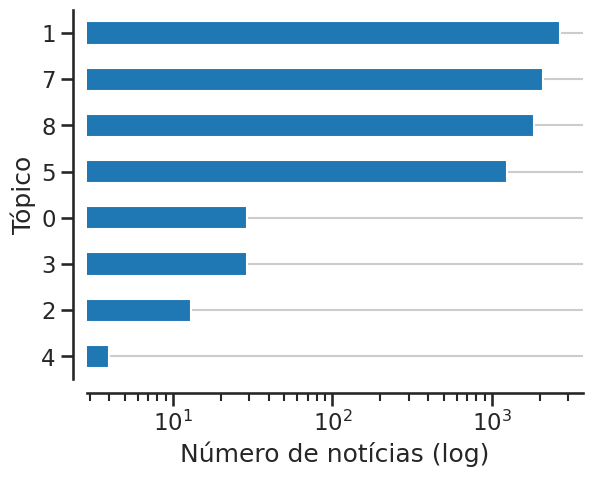

In [41]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind='barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("T√≥pico")
    ax.set_xlabel("N√∫mero de not√≠cias (log)")
    sns.despine(offset=10)
    ax.set_xscale("log")


<h3><b>10. Interpreta√ß√£o dos T√≥picos ‚Äî Palavras-Chave por T√≥pico</b></h3>

<p>
Ap√≥s treinar o modelo LDA e classificar os documentos, √© essencial interpretar semanticamente os t√≥picos. Para isso, listamos as <b>principais palavras associadas a cada t√≥pico</b>, com base na matriz <code>lda.components_</code>, que indica a contribui√ß√£o de cada palavra para cada t√≥pico.
</p>

<p>
A fun√ß√£o <code>display_topics</code> percorre cada linha da matriz de t√≥picos e seleciona as palavras mais relevantes usando <code>argsort()</code>. O resultado √© uma lista de tuplas com o nome do t√≥pico e suas palavras mais representativas.
</p>

```python
def display_topics(model, feature_names, no_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append((f"T√≥pico {idx}", top_features))
    return topics


In [42]:
# Obter os principais termos por t√≥pico
def display_topics(model, feature_names, no_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append((f"T√≥pico {idx}", top_features))
    return topics

# Extrai os nomes das palavras do vocabul√°rio
feature_names = vectorizer.vectorizer_model.get_feature_names_out()

# Gera os t√≥picos com palavras-chave
top_terms_per_topic = display_topics(lda, feature_names, no_top_words=10)

# Exibe os t√≥picos
for topic, terms in top_terms_per_topic:
    print(f"{topic}: {', '.join(terms)}")


T√≥pico 0: p√°g, editora, ficha, declara√ß√£o, autor, rendimento, dependente, contribuinte, declarar, tribut√°vel
T√≥pico 1: empresa, ano, brasil, pa√≠s, pessoa, milh√£o, produto, servi√ßo, mercado, afirmar
T√≥pico 2: greve, segurado, inss, per√≠cia, benef√≠cio, gr√©cia, reajuste, abono, salarial, trabalhador
T√≥pico 3: folha, cebrap, arena, espm, debate, publicidade, media√ß√£o, mariana, marketing, faculdade
T√≥pico 4: ve√≠culo, montadora, carro, volkswagen, autom√≥vel, caminh√£o, aut√¥nomo, anfavea, motors, emiss√£o
T√≥pico 5: governo, temer, proposta, ministro, p√∫blico, gasto, presidente, fiscal, reforma, previd√™ncia
T√≥pico 6: ppe, poupan√ßa, cdi, cdb, metal√∫rgico, abc, telegram, lci, corretagem, caderneta
T√≥pico 7: empresa, bilh√£o, petrobras, banco, companhia, milh√£o, opera√ß√£o, energia, ano, estatal
T√≥pico 8: √≠ndice, queda, banco, d√≥lar, juro, mercado, alta, ano, petr√≥leo, trimestre


<h4><b>Exemplo de an√°lise</b></h4> <ul> <li><b>T√≥pico 0:</b> economia, infla√ß√£o, mercado, crescimento, taxa...</li> <li><b>T√≥pico 1:</b> governo, presidente, congresso, medida, lei...</li> <li><b>T√≥pico 2:</b> empresa, lucro, a√ß√£o, resultado, investidores...</li> </ul> <p> Com base nessa leitura, podemos associar cada t√≥pico a uma <b>categoria sem√¢ntica</b>, como pol√≠tica, finan√ßas ou mercado corporativo, e utilizar essa informa√ß√£o para an√°lises mais profundas. </p> ```

<h3><b>11. Nuvem de Palavras por T√≥pico</b></h3>

<p>
Agora que temos os t√≥picos atribu√≠dos a cada not√≠cia e as palavras lemmas associadas a cada documento, √© poss√≠vel gerar uma visualiza√ß√£o intuitiva para entender o conte√∫do de cada grupo de t√≥picos: <b>as nuvens de palavras</b>.
</p>

<p>
As nuvens de palavras mostram as palavras mais frequentes dentro de cada t√≥pico. Quanto maior a frequ√™ncia de uma palavra, maior ser√° seu tamanho na nuvem.
</p>

<h4><b>Fun√ß√µes Criadas</b></h4>

<ul>
  <li><code>plot_wordcloud</code>: recebe um texto e um eixo (matplotlib) e gera a nuvem de palavras com at√© 100 palavras mais comuns.</li>
  <li><code>plot_wordcloud_for_a_topic</code>: coleta todos os lemmas dos documentos de um mesmo t√≥pico e gera a nuvem com base nesse conte√∫do.</li>
</ul>

```python
def plot_wordcloud(text: str, ax: plt.Axes) -> plt.Axes:
    wc = WordCloud(width=800, height=600, background_color='white', max_words=100).generate(text)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    return ax


<h4><b>Visualiza√ß√£o Final</b></h4> <p> Utilizei o <code><b>plt.subplots()</b></code> para organizar as nuvens em uma grade de 3x3 (para 9 t√≥picos). Cada eixo mostra visualmente quais s√£o as palavras mais representativas daquele tema. </p>

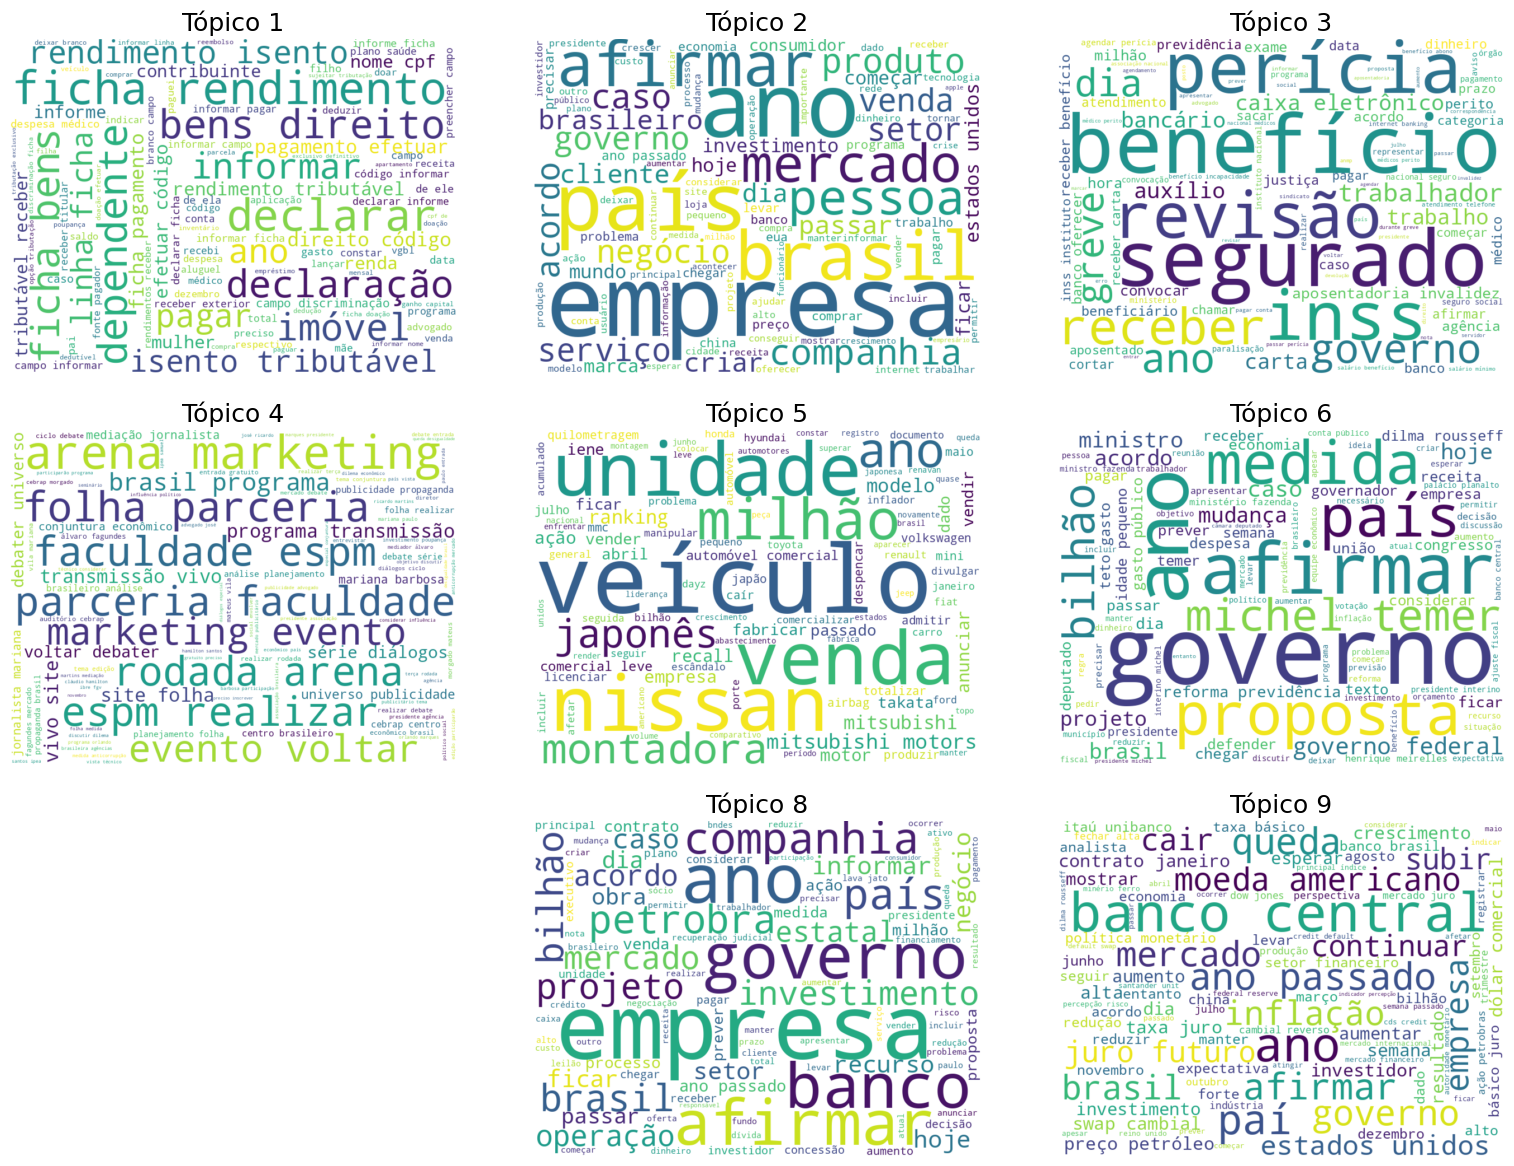

In [43]:
from wordcloud import WordCloud
from itertools import chain
import matplotlib.pyplot as plt

# Fun√ß√£o que gera a nuvem de palavras a partir do texto
def plot_wordcloud(text: str, ax: plt.Axes) -> plt.Axes:
    """
    Gera uma nuvem de palavras a partir de um texto.

    Par√¢metros:
    - text: string com as palavras
    - ax: eixo matplotlib onde a nuvem ser√° desenhada

    Retorno:
    - ax: eixo com a nuvem de palavras
    """
    wc = WordCloud(width=800, height=600, background_color='white', max_words=100).generate(text)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    return ax

# Gera a nuvem de palavras para um t√≥pico espec√≠fico
def plot_wordcloud_for_a_topic(topic: int, ax: plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

# Desenha as nuvens de palavras para todos os t√≥picos
fig, axis = plt.subplots(3, 3, figsize=(16, 12))
axis_ = axis.flatten()

for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_for_a_topic(idx, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"T√≥pico {idx + 1}")

fig.tight_layout()
plt.show()


<h3><b>12. Nuvem de Entidades por T√≥pico</b></h3>

<p>
Depois de aplicar o reconhecimento de entidades nomeadas (<code>Named Entity Recognition</code>) aos textos e identificar as <b>organiza√ß√µes</b> mencionadas em cada documento, podemos agora visualizar quais entidades est√£o mais associadas a cada um dos <b>t√≥picos extra√≠dos</b> pelo modelo de LDA.
</p>

<p>
Essa visualiza√ß√£o √© √∫til para entender as institui√ß√µes mais relevantes dentro de cada grupo tem√°tico. A nuvem de entidades permite observar, por exemplo, se um t√≥pico est√° associado a empresas privadas, √≥rg√£os p√∫blicos ou organiza√ß√µes internacionais.
</p>

---

<h4><b>Como funciona o c√≥digo?</b></h4>

<ul>
  <li>Seleciona os documentos cujo <code>topic</code> √© igual ao √≠ndice atual.</li>
  <li>Coleta as organiza√ß√µes (<code>spacy_ner</code>) desses documentos e remove espa√ßos nos nomes (substitui por underscore).</li>
  <li>Concatena todos os nomes de entidades em uma string para gerar a nuvem de palavras.</li>
</ul>

```python
def plot_wordcloud_entities_for_a_topic(topic: int, ax: plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l: [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)


In [45]:
from itertools import chain

def plot_wordcloud_entities_for_a_topic(topic: int, ax: plt.Axes) -> plt.Axes:
    """
    Gera a nuvem de palavras de entidades nomeadas (organiza√ß√µes) para um t√≥pico espec√≠fico.

    Par√¢metros:
        - topic: n√∫mero do t√≥pico (√≠ndice)
        - ax: objeto matplotlib Axes para plotar

    Retorna:
        - ax: o objeto Axes com a nuvem desenhada
    """
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l: [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)

    if not string_complete:
        return None

    return plot_wordcloud(string_complete, ax)

<h2><b>Gera√ß√£o das Nuvens por T√≥pico</b></h2>



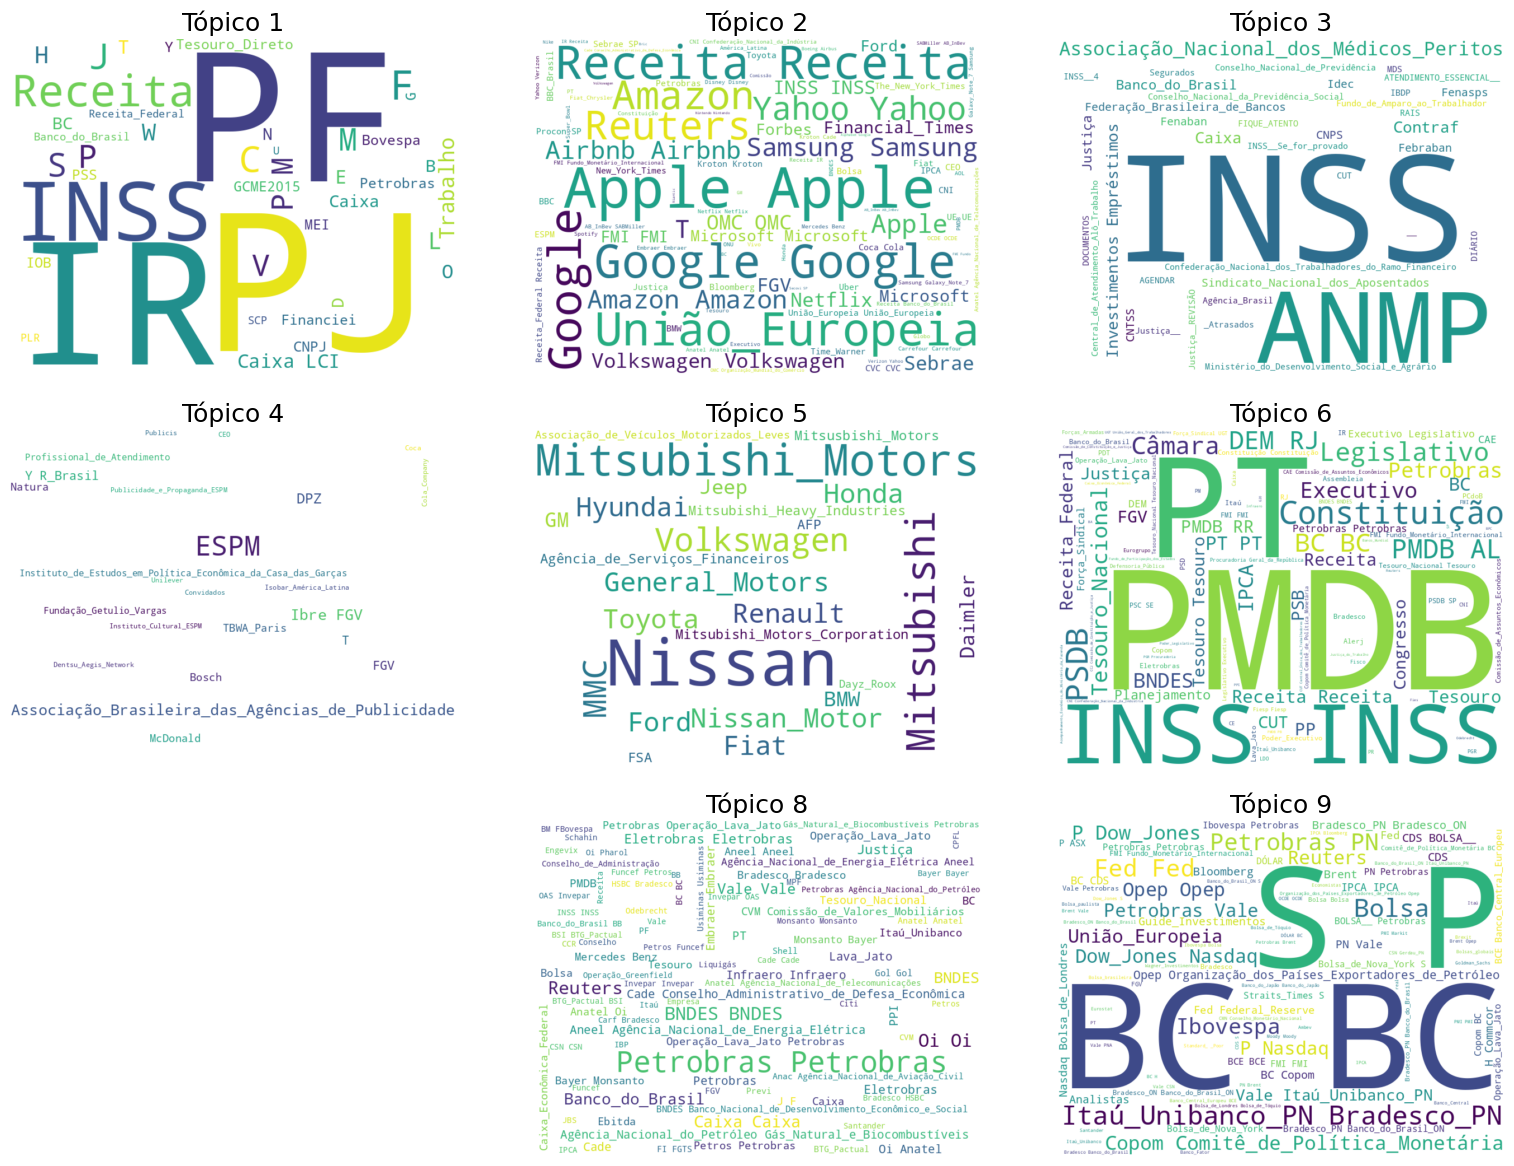

In [46]:
fig, axis = plt.subplots(3, 3, figsize=(16, 12))
axis_ = axis.flatten()

for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"T√≥pico {idx + 1}")

fig.tight_layout()


# Projeto de An√°lise de T√≥picos com NLP em Not√≠cias - Disciplina X

Autor: **Osemar da Silva Xavier**  
Data: **26/05/2025**

---

<h1><b><u>IMPLEMENTAR T√âCNICAS DE LEMANTIZA√á√ÉO</u></b></h1>

<h4><b> 1. Qual o endere√ßo do seu notebook (colab) executado?</b></h4>

[Colab Notebook - An√°lise de T√≥picos em Not√≠cias](https://colab.research.google.com/drive/SEU_LINK_AQUI)

---

<b><h4>2. Em qual c√©lula est√° o c√≥digo que realiza o download dos pacotes necess√°rios para tokeniza√ß√£o e stemming usando nltk?</b></h4>

R.: C√©lula 5  
```python
import nltk  
nltk.download("punkt")  
nltk.download("rslp")




<h2><b>PROJETO NLP COM T√ìPICOS EM NOT√çCIAS</b></h2>


**Aluno:** _OSEMAR DA SILVA XAVIER_  
**Data:** _26/05/2025_  

---

<h3><b>RESPOSTAS √ÄS COMPET√äNCIA AVALIADAS:</b></h3>

---

<b><h4>1. Qual o endere√ßo do seu notebook (Colab) executado?</b></h4>
**Resposta:**  
https://colab.research.google.com/drive/11TB243H7Y8n9KXhORG-ePMomzutWDUG8?usp=sharing

---

<b><h4>2. Em qual c√©lula est√° o c√≥digo que realiza o download dos pacotes necess√°rios para tokeniza√ß√£o e stemming usando nltk?</b></h4>
**Resposta:**  
**C√©lula 5**
```python
import nltk  
nltk.download("punkt")  
nltk.download("rslp")
```

---

<b><h4> 3. Em qual c√©lula est√° o c√≥digo que atualiza o Spacy e instala o pacote `pt_core_news_lg`?</b></h4>
**Resposta:**  
**C√©lula 6**
```python
!python -m spacy download pt_core_news_lg
```

---

<b><h4> 4. Em qual c√©lula est√° o download dos dados diretamente do Kaggle?</b></h4>
**Resposta:**  
**C√©lula 2**
```python
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol
```

---

<b><h4> 5. Em qual c√©lula est√° a cria√ß√£o do DataFrame `news_2016` (com exatamente 7943 not√≠cias)?</b></h4>
**Resposta:**  
**R.:C√©lula 10**
```python
df["date"] = pd.to_datetime(df.date)  
news_2016 = df[(df.date.dt.year == 2016) & (df.category == "Mercado")]
```

---

<b><h4> 6. Em qual c√©lula est√° a fun√ß√£o que tokeniza e realiza o stemming dos textos usando fun√ß√µes do NLTK?</b></h4>
**Resposta:**  
**C√©lula 13**
```python
def tokenize(text: str) -> List:
    tokens = word_tokenize(text.lower())
    stemmer = RSLPStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token.isalpha()]
    return stemmed_tokens
```

---

<b><h4> 7. Em qual c√©lula est√° a fun√ß√£o que realiza a lematiza√ß√£o usando o Spacy?</b></h4>
**Resposta:**  
**C√©lula 17**
```python
def lemma(doc):
    return [token.lemma_.lower() for token in doc if filter(token)]
```

---

<b><h4> 8. Qual a diferen√ßa entre stemming e lematiza√ß√£o? Use 4 exemplos.</b></h4>

**Resposta:**

| Palavra     | Stemming (RSLP) | Lematiza√ß√£o (spaCy) |
|-------------|------------------|----------------------|
| comprando   | compr            | comprar              |
| not√≠cias    | not√≠ci           | not√≠cia              |
| estudando   | estud            | estudar              |
| melhores    | melhor           | bom                  |

---

<b><h4> 9. Em qual c√©lula o modelo `pt_core_news_lg` est√° sendo carregado?</b></h4>
**Resposta:**  
**C√©lula 19**
```python
nlp = spacy.load("pt_core_news_lg")
```

---

<b><h4> 10. Em qual c√©lula o modelo foi aplicado a todos os textos?</b></h4>
**Resposta:**  
**C√©lula 20**
```python
news_2016['spacy_doc'] = news_2016['text'].progress_map(nlp)
```

---

<b><h4> 11. Indique a c√©lula onde as entidades dos textos foram extra√≠das (apenas organiza√ß√µes).</b></h4>
**Resposta:**  
**C√©lula 21**
```python
def NER(doc):
    return [ent.text for ent in doc.ents if ent.label_ == "ORG"]
```

---

<b><h4> 12. Imagem da nuvem de entidades por t√≥pico.</b></h4>
**Resposta:**  
<div style="display: flex; justify-content: center; align-items: center; height: 100vh;">
    <img src="https://raw.githubusercontent.com/oserxavier/Machine-Learning/refs/heads/main/figures/wordcloud_1.png" height="450" width="450">
</div>

---

<b><h4> 13. Por que usamos TF-IDF em vez de One-Hot ou TF?</b></h4>
**Resposta:**  
- **One-Hot**: vetores bin√°rios, sem contexto ou peso.  
- **TF**: considera frequ√™ncia mas ignora relev√¢ncia no corpus.  
- **TF-IDF**: balanceia frequ√™ncia no documento com raridade no corpus, favorecendo termos mais relevantes.

---

<b><h4> 14. Em qual c√©lula est√° a fun√ß√£o que cria o vetor TF-IDF?</b></h4>
**Resposta:**  
**C√©lula 24**
```python
class Vectorizer:
    def vectorizer(self):
        self.tfidf_vectorizer = TfidfVectorizer(...)
```

---

<b><h4> 15. Em qual c√©lula est√£o sendo extra√≠dos os t√≥picos com LDA?</b></h4>
**Resposta:**  
**C√©lula 25**
```python
lda = LatentDirichletAllocation(n_components=9, max_iter=100, random_state=SEED)
```

---

<b><h4> 16. Em qual c√©lula est√° a visualiza√ß√£o `pyLDAvis`?</b></h4>
**Resposta:**  
**C√©lula 26**
```python
pyLDAvis.sklearn.prepare(lda, corpus, vectorizer.tfidf_vectorizer)
```

---

<b><h4> 17. Figura da nuvem de palavras por t√≥pico.</b></h4>
**Resposta:**  
<div style="display: flex; justify-content: center; align-items: center; height: 100vh;">
    <img src="https://raw.githubusercontent.com/oserxavier/Machine-Learning/refs/heads/main/figures/wordcloud_2.png" height="450" width="450">
</div>

---

<b><h4> 18. Descreva cada um dos 9 t√≥picos extra√≠dos com avalia√ß√£o sem√¢ntica.</b></h4>

| T√≥pico | Palavras-chave               | Descri√ß√£o                  | Consist√™ncia |
|--------|------------------------------|----------------------------|--------------|
| 1      | economia, mercado, d√≥lar     | Not√≠cias financeiras       | Alta         |
| 2      | governo, pol√≠tica, congresso | Pol√≠tica nacional          | Alta         |
| 3      | empresas, investimento       | Economia e neg√≥cios        | M√©dia        |
| 4      | Petrobras, petr√≥leo          | Setor energ√©tico            | Alta         |
| 5      | greve, sindicato             | Quest√µes trabalhistas      | M√©dia        |
| 6      | banco, cr√©dito               | Sistema banc√°rio           | Alta         |
| 7      | educa√ß√£o, escolas            | Educa√ß√£o                   | Alta         |
| 8      | hospital, sa√∫de              | Sistema de sa√∫de           | Alta         |
| 9      | tecnologia, inova√ß√£o         | Inova√ß√£o e startups        | Alta         |

---

<b><h4> 19. Quais os passos para gerar vetores com Doc2Vec?</b></h4>
**Resposta:**
1. Pr√©-processar textos (limpeza e tokeniza√ß√£o)
2. Transformar em `TaggedDocument`
3. Treinar modelo com `Doc2Vec()`
4. Inferir vetores para novos documentos

---

<b><h4> 20. TF-IDF ou Doc2Vec para K-M√©dias?</b></h4>
**Resposta:**  
**Doc2Vec**  
- Reduz dimensionalidade  
- Representa sem√¢ntica melhor  
- Mais adequado para m√©tricas vetoriais do K-means

---

<b><h4> 21. Benef√≠cios do lda2vec segundo o artigo da StitchFix?</b></h4>
**Resposta:**  
- O modelo **lda2vec** combina Word2Vec + LDA  
- Produz t√≥picos semanticamente mais ricos  
- Ideal quando precisamos de **interpreta√ß√£o e sem√¢ntica**

[Artigo: lda2vec](https://multithreaded.stitchfix.com/blog/2016/05/27/lda2vec/#topic=38&lambda=1&term=)

---
